## Load Libraries

In [ ]:
## Plotting Libaray
import matplotlib.pyplot as plt ## used for creating Graphs and charts
import seaborn as sns ## used for creating Graphs and charts
import plotly.express as px
## Pandas Dataframe Library
import pandas as pd
## Numpy Library
import numpy as np ## used for methamtical compution and handle multi-dimensional arrays and matrices
## Train and Test Split
from sklearn.model_selection import train_test_split
## Normalize
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
## Models
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Dropout
from keras.optimizers import *
## Sampling Technique
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

## Importing dataset


In [ ]:
df = pd.read_csv (r'/content/healthcare-dataset-stroke-data.csv')

In [ ]:
df.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## Number of Rows and Columns

In [ ]:
## Dimensionlaity of the Model
print("Number of Rows:", df.shape[0])
print("Number of Columns:", df.shape[1])

Number of Rows: 5110
Number of Columns: 12


## Columns

In [ ]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

# Type of Columns

In [ ]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [ ]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


## Description for Categorical Columns

## Following info is deduced from it

* Using mean we can deduced that 4 % of the people have stokes as per the dataset.
* Avg. age t is 43 year
* Only 5% had Heart related isssue.
* Avg BMI is 28 and glucose level is 106.


In [ ]:
df.describe(include=['object'])

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


Following Info is deduced from it
*  Most of the patients were are marrried
*  Most of the patients work in private sector
*  Most of the patient haven't smoked
* Most of the patients lived in urban areas

## Data Info Checking any Null Value

In [ ]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

## **Bmi has many null values there are different ways to handle it which are**



*   Remove all null rows
*   Use interpolation
*   fill value with mean



We will use Interpolation for handling the null value as it handle both object and numeric values easily

Two interpolation method will be used

* Interpolation through padding (Interpolation through padding means copying the value just before a missing entry)

* Linear Interpolation

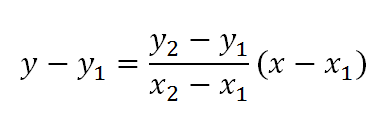

In [ ]:
## The methatical model of linear interpolation is performed on the dataframe to handle data linearly
df = df.interpolate()

In [ ]:
## Padding Interpolation is used to fill in the gaps left by Linear Interpolation. When using padding interpolation, you must set a limit, which is the maximum amount of nans the technique may fill in a row.
df = df.interpolate(method='pad', limit=15)

In [ ]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

## Exploratory Analysis

## Storke Cases

In [ ]:
## Stoke Cases
cases= df['stroke'].value_counts()
cases

0    4861
1     249
Name: stroke, dtype: int64

<Axes: xlabel='stroke', ylabel='count'>

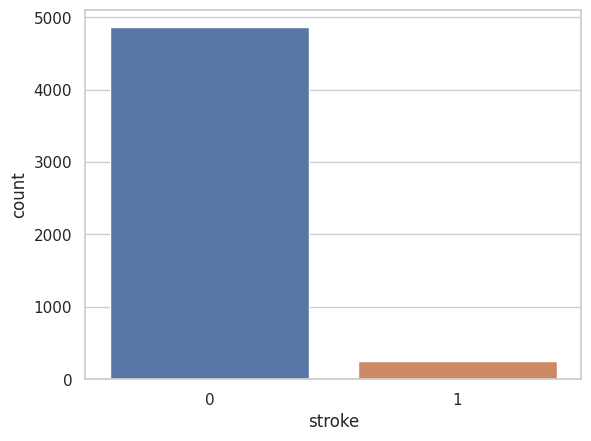

In [ ]:
sns.countplot(x = df['stroke'])

## Number of Male and Female in Dataset

In [ ]:
## Total Genders
sex= df['gender'].value_counts()
sex

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

## Removing single other value

In [ ]:
df = df[(df.gender != 'Other')]

<Axes: xlabel='gender', ylabel='count'>

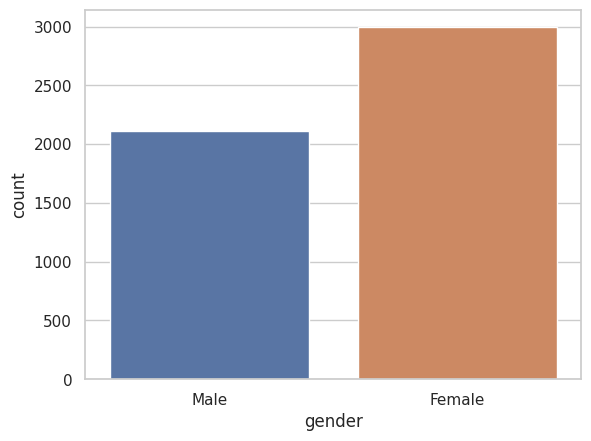

In [ ]:
sns.countplot(x = df['gender'])

## Type of Work people doing

In [ ]:
## Plot work type
fig = px.pie(df, values=df['work_type'].value_counts().values, names=df['work_type'].value_counts().index,
             title='Work type' ,
             color_discrete_sequence=px.colors.sequential.Cividis_r
            )
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

## Checking Percentage of Males and Females with heart dieases

Visualizing Males and Females heart disease By Pie Plot


In [ ]:
## Plot Heart diesase w.r.t gender
fig = px.pie(df, values='heart_disease', names='gender',
             title='Percentage of Heart Diease w.r.t to Gender' ,
             color_discrete_sequence=px.colors.sequential.Aggrnyl
            )
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

## Patients with Hyper tension or not w.r.t to stroke
Visualizing Hyper tension and Non Hyper Tension having stroke


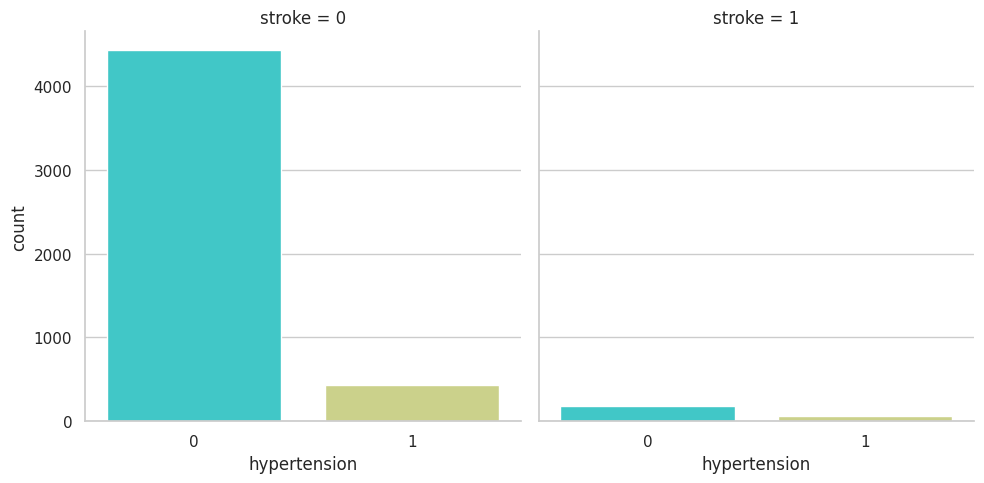

In [ ]:
## Plot Hyper tension w.r.t gender
sns.catplot(x="hypertension", col = 'stroke', data=df, kind = 'count', palette='rainbow')

## Visualizing either people from Urban or Rural People have stroke issues


In [ ]:
pd.crosstab([df["Residence_type"]], df["stroke"], margins = True).style.background_gradient(cmap = "rainbow")

stroke,0,1,All
Residence_type,,,
Rural,2399,114,2513
Urban,2461,135,2596
All,4860,249,5109


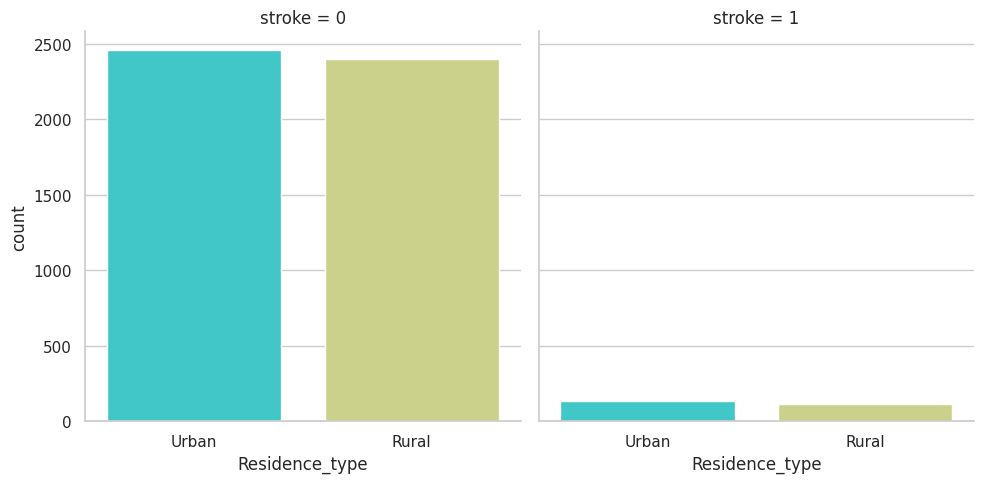

In [ ]:
## Plot Residence_type w.r.t Stroke
sns.catplot(x="Residence_type", col = 'stroke', data=df, kind = 'count', palette='rainbow')

## Stroke w.r.t Age

## this Show at people after 70 has more strokes and espacially in females

In [ ]:
## fetching only people with stoke
sdfs = df[(df.stroke == 1)]

In [ ]:
## Ploting Graph of stroke w.r.t to gender and stoke
fig = px.histogram(sdfs, x="age", y="stroke", color="gender",
                   hover_data=sdfs.columns ,
                   title = 'Sum Of Deaths With Respect to Specific Age and Gender' ,
                   color_discrete_sequence=px.colors.sequential.Blackbody,
                   width=900 ,
                   height=600)
fig.show()

In [ ]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.60,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,34.55,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.50,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.40,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.00,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,29.30,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.00,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.60,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.60,formerly smoked,0


## Avg Gluscose rate w.r.t to age and gender

* showing womens have the high percentage of avg high glucose as there age increases

In [ ]:
fig = px.pie(sdfs, values='avg_glucose_level', names='age',
             title='Avg Glucose Effect on Death Event' ,
             color = 'gender'
            )
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

## Vislulizing how many %Percentage of people having Hypetension and heart diease lead to Stroke

In [ ]:
fig = px.bar(df, x="hypertension", y="heart_disease", color="gender", barmode="group",facet_col="stroke",
             )
fig.show()

## At What Values BMI Is Causing More Deaths Visualizing By Hist

* For both male and female people ate the average bmi range of 25-30 have high number of stroke cases

In [ ]:
fig = px.histogram(sdfs, x="bmi", y = 'stroke' , color="gender",
                   title = 'bmi and stroke Graph' ,
                   color_discrete_sequence=px.colors.sequential.Blackbody,
                   width=900 ,
                   height=600 ,
                   hover_data=sdfs.columns)
fig.show()

## Apply Pearson Correlation

The correlation coefficient has a range of values from -1 to 1.

* A number near 0 indicates a lesser connection (precise 0 indicates no association).
* A value near 1 indicates a stronger positive correlation.

* A number nearer to -1 denotes a more pronounced negative correlation.

Formula is as follows:

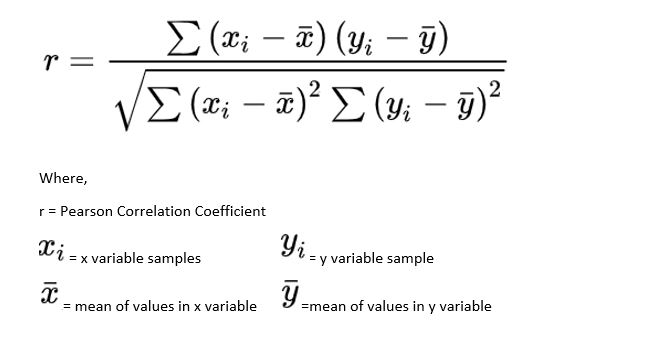




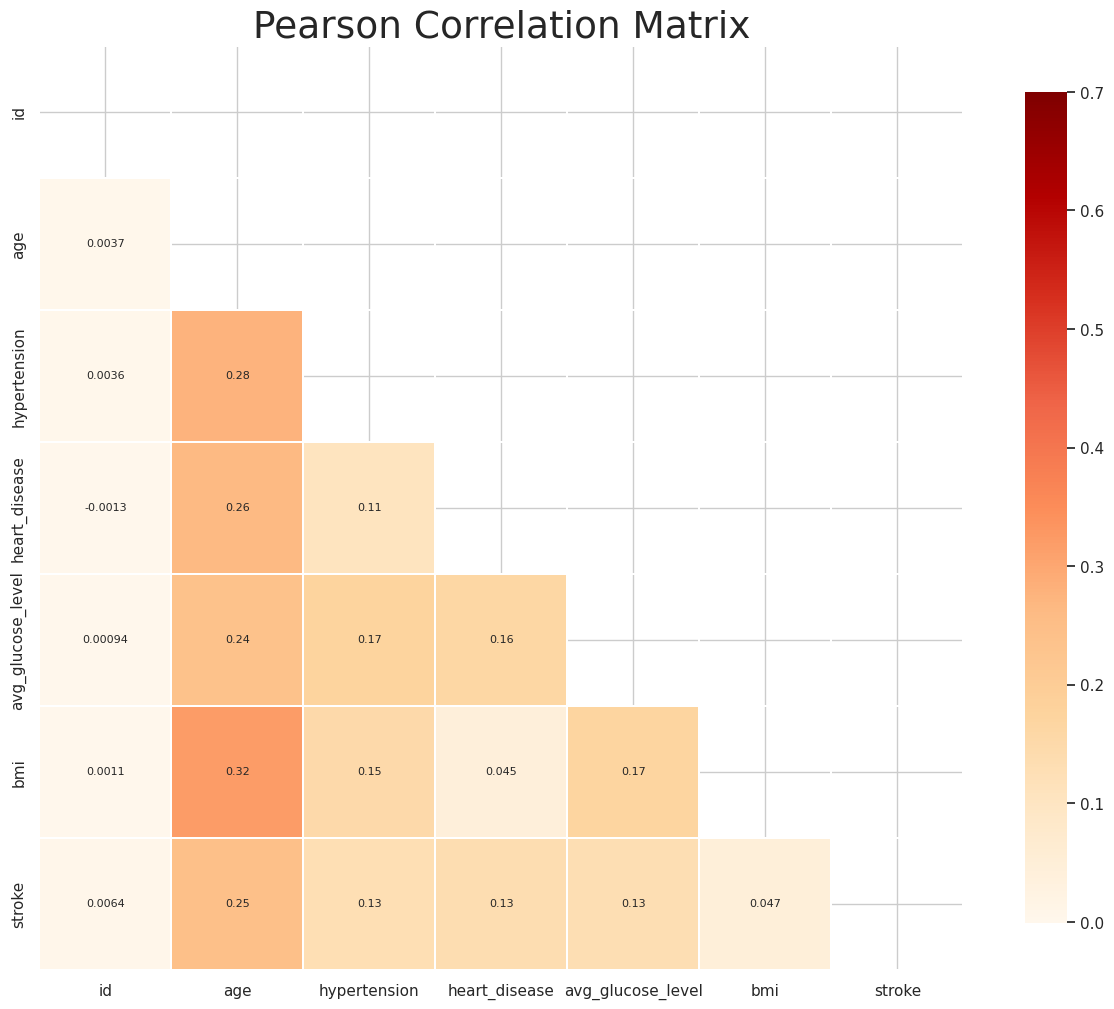

In [ ]:
features = df.columns ## Fetching all Features Column names
## Applying Pearson Correaltion
mask = np.zeros_like(df[features].corr(numeric_only=True), dtype=bool)
mask[np.triu_indices_from(mask)] = True
## Creating a Plot Diagram
f, ax = plt.subplots(figsize=(16, 12))
## Title of Plot
plt.title('Pearson Correlation Matrix',fontsize=27)
sns.heatmap(df[features].corr(numeric_only=True),linewidths=0.25,vmax=0.7,square=True,cmap="OrRd",
linecolor='w',annot=True,annot_kws={"size":8},mask=mask,cbar_kws={"shrink": .9});

## Categorical Encoder

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5109 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5109 non-null   int64  
 1   gender             5109 non-null   object 
 2   age                5109 non-null   float64
 3   hypertension       5109 non-null   int64  
 4   heart_disease      5109 non-null   int64  
 5   ever_married       5109 non-null   object 
 6   work_type          5109 non-null   object 
 7   Residence_type     5109 non-null   object 
 8   avg_glucose_level  5109 non-null   float64
 9   bmi                5109 non-null   float64
 10  smoking_status     5109 non-null   object 
 11  stroke             5109 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 518.9+ KB


In [ ]:
column = ['gender','ever_married','work_type','Residence_type','smoking_status']

In [ ]:
le = preprocessing.LabelEncoder()
categ = list(df.select_dtypes(include=['object']).columns)

In [ ]:
# Encode Categorical Columns
df[column] = df[column].apply(le.fit_transform)

## Stroke Preditction

In [ ]:
## Split dataset
x = df.drop(['id','stroke'],axis=1)
y = df[[ 'stroke']]

## Normalizing data

In [ ]:
# Get column names first
names = x.columns
# Create the Scaler object
sc = StandardScaler()
# Fit your data on the scaler object
x = sc.fit_transform(x)
x = pd.DataFrame(x, columns=names)

## CLass Balancing

###  WE can see that from visulization the data is highly imbalance which eventully lead to overfiting during the training phase So to save the model from that we gonna use imbalancing technqiue to solve it i.e : oversampling and undersampling

*   SOMTE (OverSampling)
*   RandomUnderSampler (Undersampling)



In [ ]:
## Class Balancing
over = SMOTE()
under = TomekLinks()
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
x, y = pipeline.fit_resample(x, y)

## Train and Test Split

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

## Machine Learning Model Training

##Models: SVM , GaussianNB, MLPClassifier, LogisticRegression

In [ ]:
svc = SVC(random_state =7,probability=True)
nb = GaussianNB()
mlp=MLPClassifier(random_state=7, max_iter=1000)
lr=LogisticRegression(random_state=7, max_iter=1000)

##ML Model Training

In [ ]:
classifiers = [svc, nb, mlp, lr]
results = []

for classifier in classifiers:
    classifier.fit(xtrain, ytrain.values.ravel())
    y_pred = classifier.predict(xtest)
    results.append(y_pred)

##ML Model Evaluation

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
metrics = {
    "Classifier": ["SVC", "GaussianNB", "MLP", "LogisticRegression"],
    "Accuracy": [accuracy_score(ytest, y_pred) for y_pred in results],
    "Precision": [precision_score(ytest, y_pred) for y_pred in results],
    "Recall": [recall_score(ytest, y_pred) for y_pred in results],
    "F1-Score": [f1_score(ytest, y_pred) for y_pred in results]
}

metrics_df = pd.DataFrame(metrics)

Classifier: SVC
              precision    recall  f1-score   support

           0       0.89      0.78      0.83       962
           1       0.81      0.91      0.85       977

    accuracy                           0.84      1939
   macro avg       0.85      0.84      0.84      1939
weighted avg       0.85      0.84      0.84      1939

[[751 211]
 [ 91 886]]


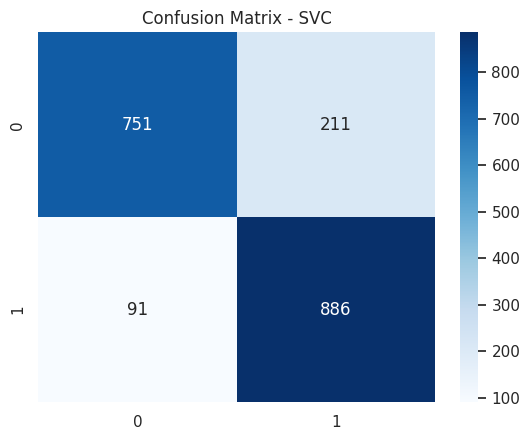

Classifier: GaussianNB
              precision    recall  f1-score   support

           0       0.79      0.73      0.76       962
           1       0.75      0.80      0.78       977

    accuracy                           0.77      1939
   macro avg       0.77      0.77      0.77      1939
weighted avg       0.77      0.77      0.77      1939

[[704 258]
 [191 786]]


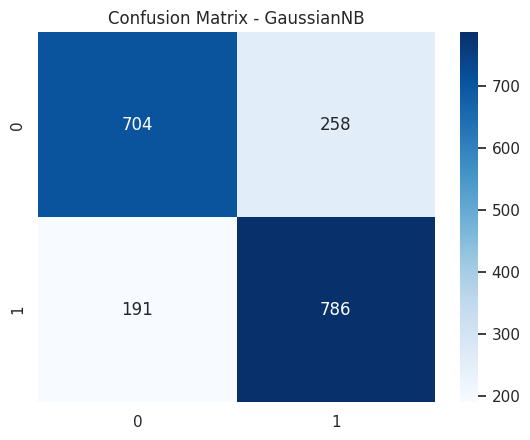

Classifier: MLP
              precision    recall  f1-score   support

           0       0.97      0.90      0.94       962
           1       0.91      0.98      0.94       977

    accuracy                           0.94      1939
   macro avg       0.94      0.94      0.94      1939
weighted avg       0.94      0.94      0.94      1939

[[868  94]
 [ 24 953]]


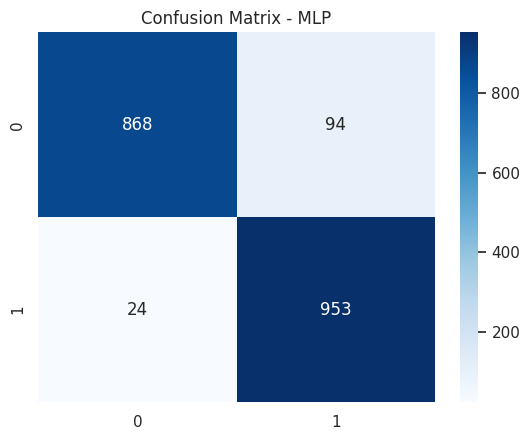

Classifier: LogisticRegression
              precision    recall  f1-score   support

           0       0.79      0.75      0.77       962
           1       0.76      0.81      0.79       977

    accuracy                           0.78      1939
   macro avg       0.78      0.78      0.78      1939
weighted avg       0.78      0.78      0.78      1939

[[718 244]
 [188 789]]


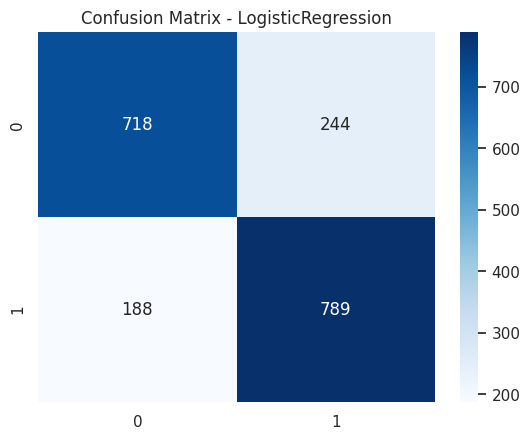

In [ ]:
for i, classifier in enumerate(classifiers):
    print(f"Classifier: {metrics_df['Classifier'][i]}")
    print(classification_report(ytest, results[i]))
    cm = confusion_matrix(ytest, results[i])
    print(cm)
    plt.figure()
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
    plt.title(f'Confusion Matrix - {metrics_df["Classifier"][i]}')
    plt.show()

##Compairison of ML Models

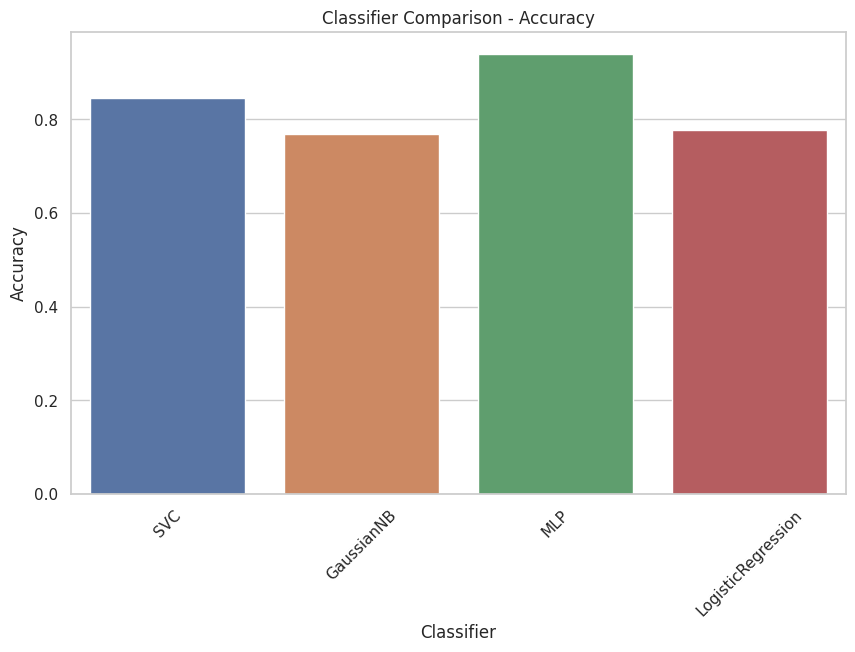

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Classifier', y='Accuracy', data=metrics_df)
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Classifier Comparison - Accuracy')
plt.xticks(rotation=45)
plt.show()

##Deep Learning Models (Keras Classifier)

In [ ]:
!pip install scikeras

In [ ]:
from scikeras.wrappers import KerasClassifier

In [ ]:
def twoLayerFeedForward():
    clf = Sequential()
    clf.add(Dense(64, activation='relu', input_dim=10))
    clf.add(Dropout(rate=0.2))
    clf.add(Dense(32, activation='relu'))
    clf.add(Dense(1, activation='sigmoid'))
    clf.compile(loss='binary_crossentropy', optimizer='adam', metrics=["accuracy"])
    return clf

clf = KerasClassifier(twoLayerFeedForward, epochs=100, batch_size=32, verbose=0)
clf._estimator_type = "classifier"

##Training Deep Learning Model

In [ ]:
clf.fit(xtrain, ytrain)

KerasClassifier(
	model=<function twoLayerFeedForward at 0x7f48471503a0>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=32
	validation_batch_size=None
	verbose=0
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=100
	class_weight=None
)

## Evaluation Deep Learning Model

Accuracy: 0.9210933470861269
Precision: 0.8705035971223022
Recall: 0.9907881269191402
F1-Score: 0.9267592149353757


Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.85      0.91       962
           1       0.87      0.99      0.93       977

    accuracy                           0.92      1939
   macro avg       0.93      0.92      0.92      1939
weighted avg       0.93      0.92      0.92      1939



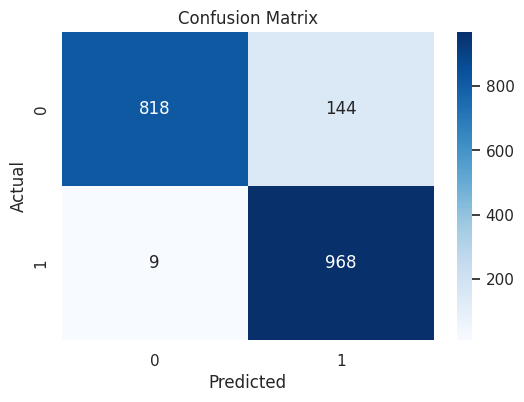

In [ ]:
ypred = clf.predict(xtest)
accuracy = accuracy_score(ytest, ypred)
precision = precision_score(ytest, ypred)
recall = recall_score(ytest, ypred)
f1 = f1_score(ytest, ypred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("\n\nClassification Report:\n", classification_report(ytest, ypred))
conf_matrix = confusion_matrix(ytest, ypred)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()



In [ ]:
keras_metrics = pd.DataFrame([{
    "Classifier": "KerasClassifier",
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1-Score": f1
}])

In [ ]:
metrics_df = pd.concat(objs=[metrics_df, keras_metrics], ignore_index=True)


## Ensemble Model

In [ ]:
params = {'voting':['soft'],
          'weights':[(1,1,1,1,1,1,1), (2,1,1,1,1,1,1),
                     (1,2,1,1,1,1,1), (1,1,2,1,1,1,1),
                     (1,1,1,2,1,1,1), (1,1,1,1,2,1,1),
                     (1,1,1,2,2,1,1), (2,1,1,1,2,1,1)]}

In [ ]:
from sklearn.ensemble import VotingClassifier

estimators= [("svc", svc), ("mlp", mlp), ("lr", lr),('clf',clf)]
ensemble = VotingClassifier(estimators,voting='soft',weights=(0.5,5,0.1,1))

## Train Ensemble Model

In [ ]:
ensemble.fit(xtrain, ytrain.values.ravel())

VotingClassifier(estimators=[('svc', SVC(probability=True, random_state=7)),
                             ('mlp',
                              MLPClassifier(max_iter=1000, random_state=7)),
                             ('lr',
                              LogisticRegression(max_iter=1000,
                                                 random_state=7)),
                             ('clf',
                              KerasClassifier(batch_size=32, epochs=100, model=<function twoLayerFeedForward at 0x7f483cc52440>, verbose=0))],
                 voting='soft', weights=(0.5, 5, 0.1, 1))

## Prediction

In [ ]:
## Model Prediction
pred = ensemble.predict(xtest)

In [ ]:
print( "Test Accuracy : " , accuracy_score(ytest,pred)*100 , "%" )

Test Accuracy :  94.37854564208354 %


##Evaluation of Ensemble Model

In [ ]:
# Make predictions on the test data and calculate the evaluation metrics
ypred = ensemble.predict(xtest)
accuracy = accuracy_score(ytest, ypred)
precision = precision_score(ytest, ypred)
recall = recall_score(ytest, ypred)
f1 = f1_score(ytest, ypred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Accuracy: 0.9437854564208354
Precision: 0.908662900188324
Recall: 0.9877175025588536
F1-Score: 0.9465424227562531


Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.90      0.94       962
           1       0.91      0.99      0.95       977

    accuracy                           0.94      1939
   macro avg       0.95      0.94      0.94      1939
weighted avg       0.95      0.94      0.94      1939

[[865  97]
 [ 12 965]]


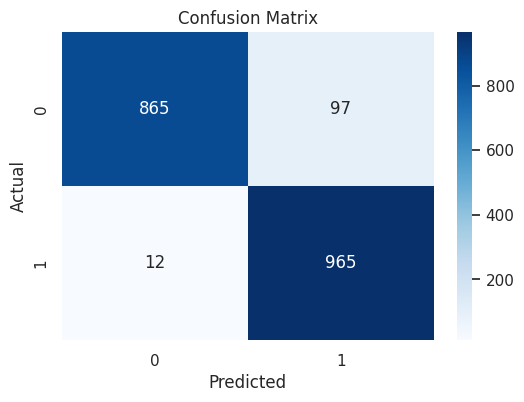

In [ ]:
print("Classification Report:\n", classification_report(ytest, ypred))
conf_matrix = confusion_matrix(ytest, ypred)
print(conf_matrix)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# Create a dictionary with VotingClassifier metrics
voting_metrics = pd.DataFrame([{
    "Classifier": "VotingClassifier",
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1-Score": f1
}])

In [ ]:
# Append VotingClassifier metrics to the metrics_df DataFrame
metrics_df = pd.concat(objs=[metrics_df,voting_metrics], ignore_index=True)

##Results Comparision of all models

In [ ]:
metrics_df

,Classifier,Accuracy,Precision,Recall,F1-Score
0,SVC,0.845281,0.807448,0.909928,0.855630
1,GaussianNB,0.764827,0.751691,0.796315,0.773360
2,MLP,0.941723,0.909091,0.982600,0.944417
3,LogisticRegression,0.777205,0.764306,0.806551,0.784861
4,KerasClassifier,0.915936,0.862100,0.991812,0.922418
5,VotingClassifier,0.943785,0.908663,0.987718,0.946542


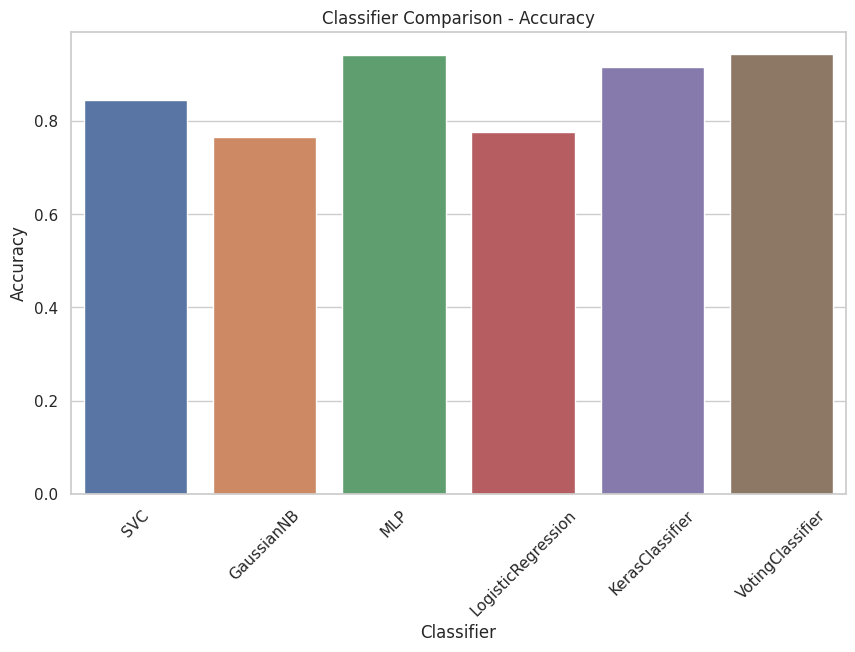

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Classifier', y='Accuracy', data=metrics_df)
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Classifier Comparison - Accuracy')
plt.xticks(rotation=45)
plt.show()

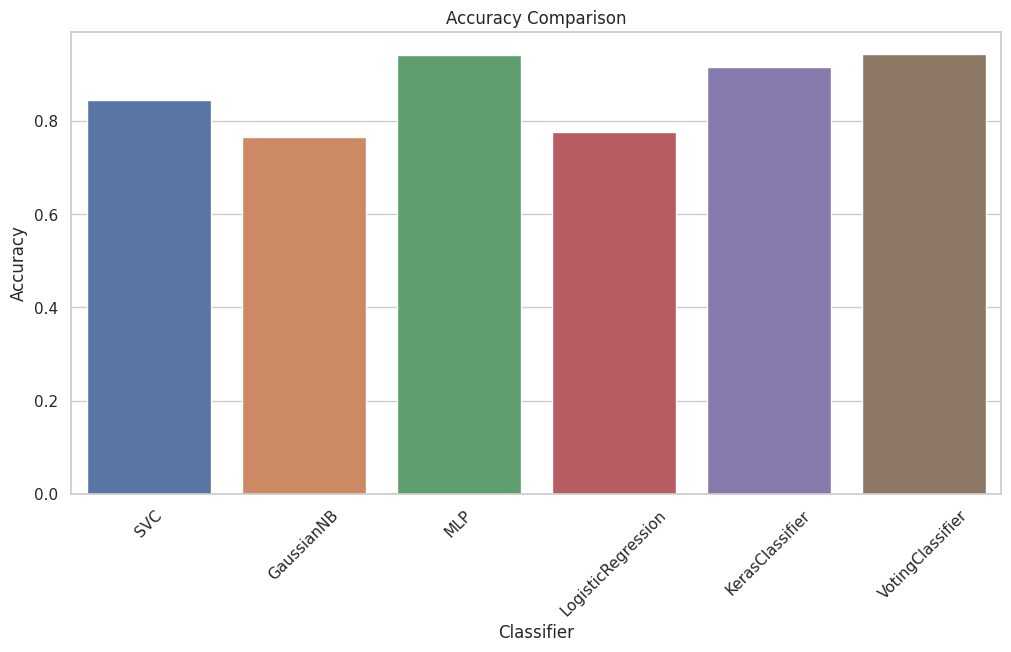

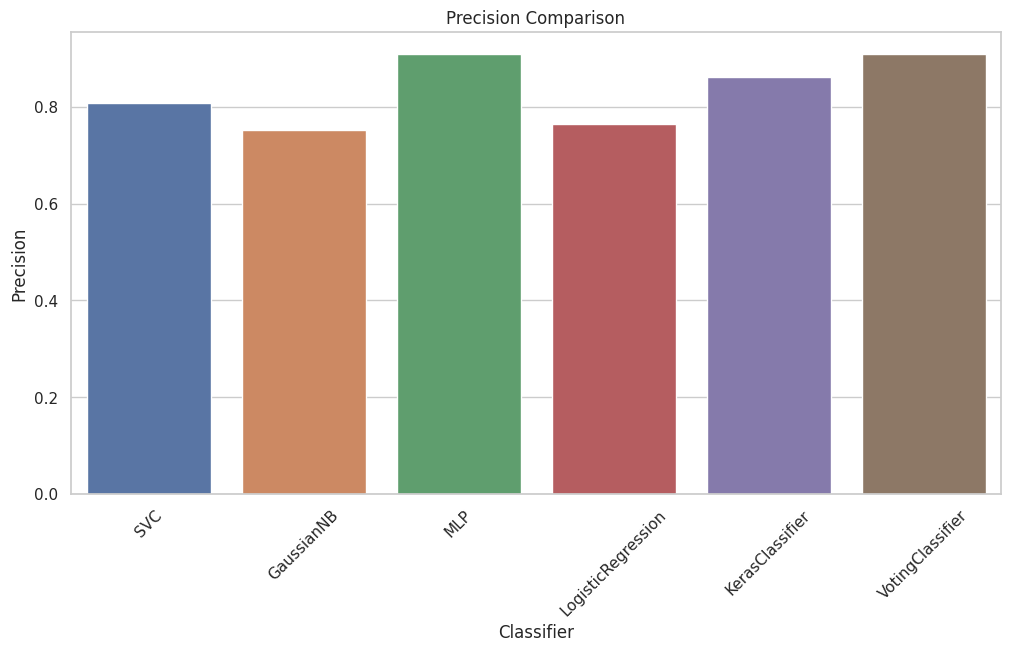

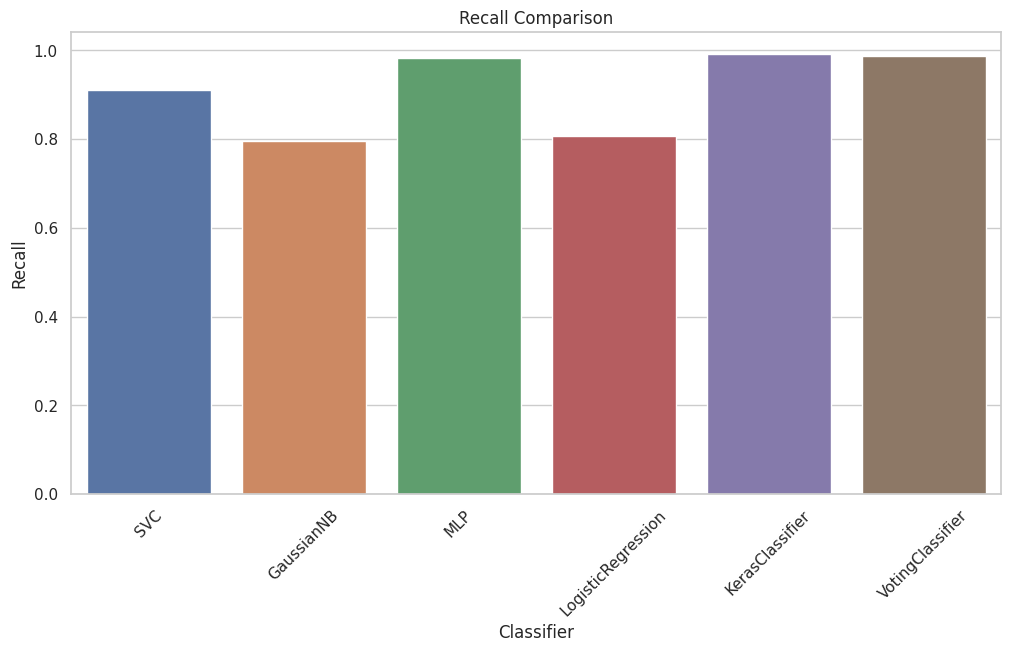

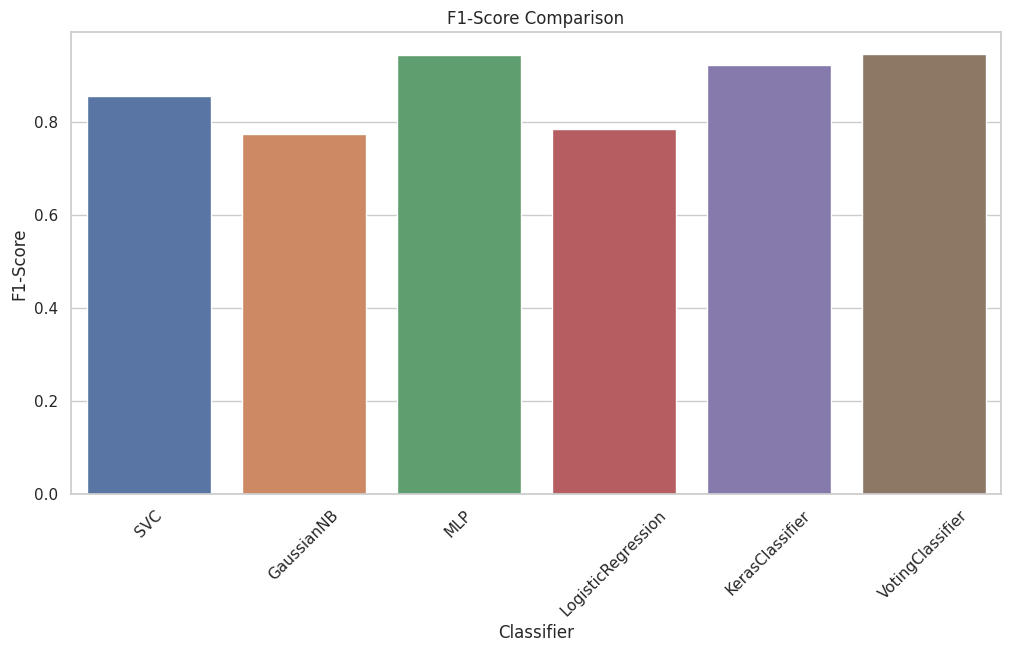

In [ ]:
# Set the style for the plot
sns.set(style="whitegrid")

# Create a bar plot for accuracy
plt.figure(figsize=(12, 6))
sns.barplot(x='Classifier', y='Accuracy', data=metrics_df)
plt.title('Accuracy Comparison')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.show()

# Create a bar plot for precision
plt.figure(figsize=(12, 6))
sns.barplot(x='Classifier', y='Precision', data=metrics_df)
plt.title('Precision Comparison')
plt.xlabel('Classifier')
plt.ylabel('Precision')
plt.xticks(rotation=45)
plt.show()

# Create a bar plot for recall
plt.figure(figsize=(12, 6))
sns.barplot(x='Classifier', y='Recall', data=metrics_df)
plt.title('Recall Comparison')
plt.xlabel('Classifier')
plt.ylabel('Recall')
plt.xticks(rotation=45)
plt.show()

# Create a bar plot for F1-Score
plt.figure(figsize=(12, 6))
sns.barplot(x='Classifier', y='F1-Score', data=metrics_df)
plt.title('F1-Score Comparison')
plt.xlabel('Classifier')
plt.ylabel('F1-Score')
plt.xticks(rotation=45)
plt.show()

In [ ]:
#Exporting model using pickle
import pickle
pickle.dump(ensemble, open('/content/trained_ensemble.pkl','wb'))

In [ ]:
import pandas as pd
import numpy as np
import pickle
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler


# Reading and parsing dataset
df2 = pd.read_csv (r'/content/healthcare-dataset-stroke-data.csv')
df2 = df2.drop(['id','stroke'],axis=1)


# defining object typed columns and all columns
column = ['gender','ever_married','work_type','Residence_type','smoking_status']
feature_names = ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
                 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status']


# Filling up null bmi values using interpolation
df2 = df2.interpolate()
df2 = df2.interpolate(method='pad', limit=15)


# Initialising and fitting Label Encoder
le2 = preprocessing.LabelEncoder()
le2 = le2.fit(df2[column].values.ravel())
df2[column] = df2[column].apply(le2.transform)

# Initialising and fitting Standard Scalar
sc = StandardScaler()
sc = sc.fit(df2[feature_names])

dict = {
    'le': le2,
    'sc': sc
}

# Exporting both Label Encoder and Standard Scalar
pickle.dump(dict, open('/content/pre-fitted-preprocessors.pkl','wb'))